<a href="https://colab.research.google.com/github/rajy4683/EIP4_new/blob/master/RajeshY1stDNN_2_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


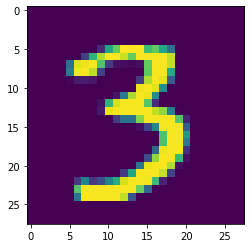

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))

#model.add(Convolution2D(512, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 10)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
history = [0] *10

In [0]:
# PLOT ACCURACIES
def plot_accuracies(history, bound_lower=0.94, bound_upper=1):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(names, loc='upper left')
    axes = plt.gca()
    bound_lower = np.array(history.history['acc']).min().round(4)
    bound_upper = np.array(history.history['acc']).max().round(4)
    axes.set_ylim([bound_lower,bound_upper])
    plt.show()

In [0]:
def plot_losses(history, bound_lower=0.002, bound_upper=1):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'],linestyle='-.')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(names, loc='upper left')
    axes = plt.gca()
    bound_lower = np.array(history.history['loss']).min().round(4)
    bound_upper = np.array(history.history['loss']).max().round(4)
    axes.set_ylim([bound_lower,bound_upper])
    plt.show()

In [16]:
history[0] = model.fit(X_train, Y_train, batch_size=50, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 24s 395us/step - loss: 0.2123 - acc: 0.9336
Epoch 2/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0612 - acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0439 - acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0330 - acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0273 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0220 - acc: 0.9934
Epoch 7/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0185 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0134 - acc: 0.9961
Epoch 9/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0150 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 21s 355us/step -

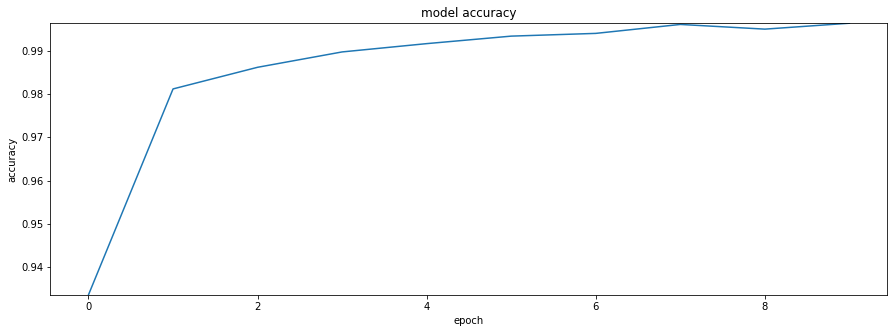

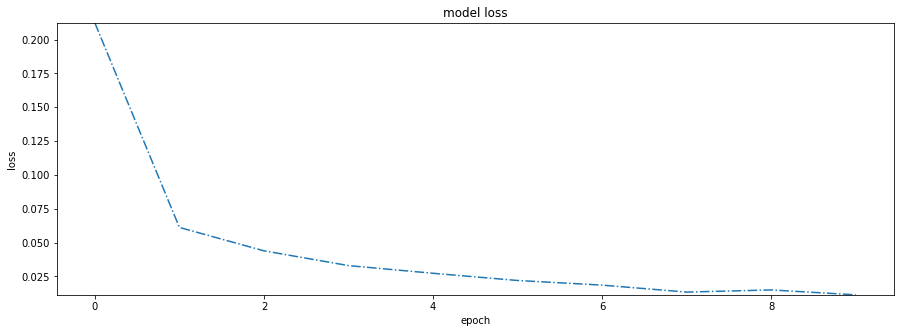

In [62]:
plot_accuracies(history[0])
plot_losses(history[0])

In [18]:
history[1]=model.fit(X_train, Y_train, batch_size=50, nb_epoch=5, verbose=1)

Epoch 1/5
  500/60000 [..............................] - ETA: 22s - loss: 0.0061 - acc: 0.9980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 21s 353us/step - loss: 0.0106 - acc: 0.9966
Epoch 2/5
60000/60000 [==============================] - 21s 351us/step - loss: 0.0087 - acc: 0.9972
Epoch 3/5
60000/60000 [==============================] - 21s 349us/step - loss: 0.0089 - acc: 0.9971
Epoch 4/5
60000/60000 [==============================] - 21s 349us/step - loss: 0.0079 - acc: 0.9973
Epoch 5/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0075 - acc: 0.9974


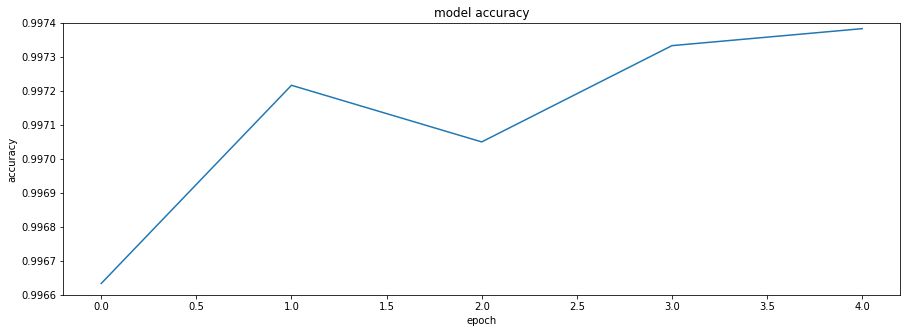

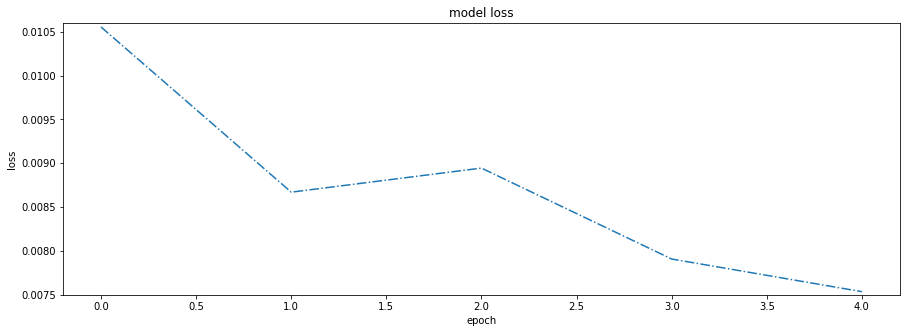

In [63]:
plot_accuracies(history[1],0.996, 1)
plot_losses(history[1])

In [20]:
history[2] = model.fit(X_train, Y_train, batch_size=50, nb_epoch=5, verbose=1)

Epoch 1/5
  500/60000 [..............................] - ETA: 21s - loss: 0.0061 - acc: 0.9960

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 21s 349us/step - loss: 0.0086 - acc: 0.9972
Epoch 2/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0054 - acc: 0.9983
Epoch 3/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0065 - acc: 0.9979
Epoch 4/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0057 - acc: 0.9985
Epoch 5/5
60000/60000 [==============================] - 21s 350us/step - loss: 0.0057 - acc: 0.9981


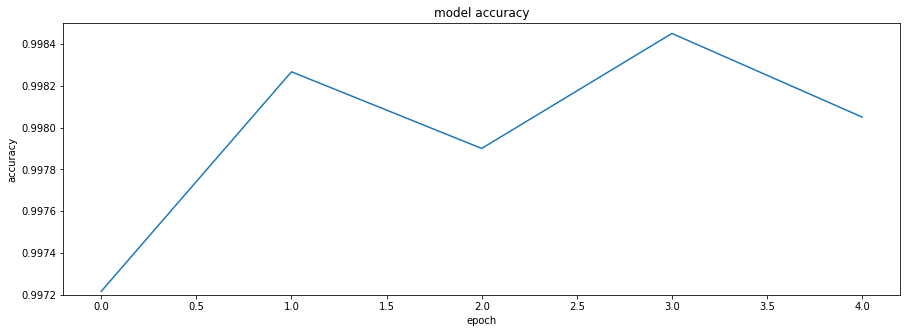

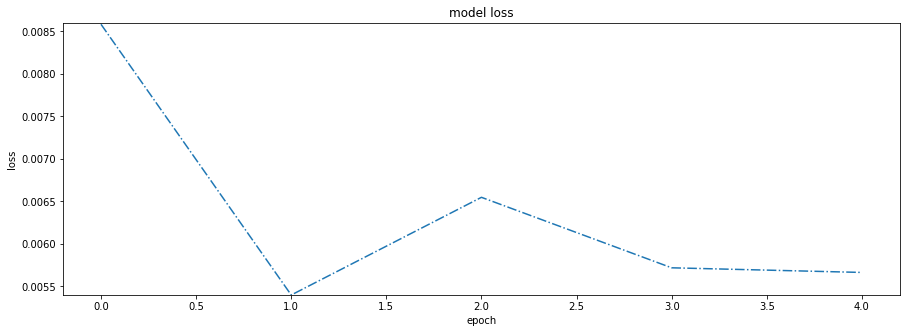

In [64]:
plot_accuracies(history[2],0.99)
plot_losses(history[2],0.004,0.008)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print(score)

[0.04870123702840215, 0.9906]


In [24]:
history[3] = model.fit(X_train, Y_train, batch_size=80, nb_epoch=2, verbose=1)

Epoch 1/2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 276us/step - loss: 0.0023 - acc: 0.9992
Epoch 2/2
60000/60000 [==============================] - 16s 271us/step - loss: 0.0028 - acc: 0.9992


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical bottom == top == 0.9992 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


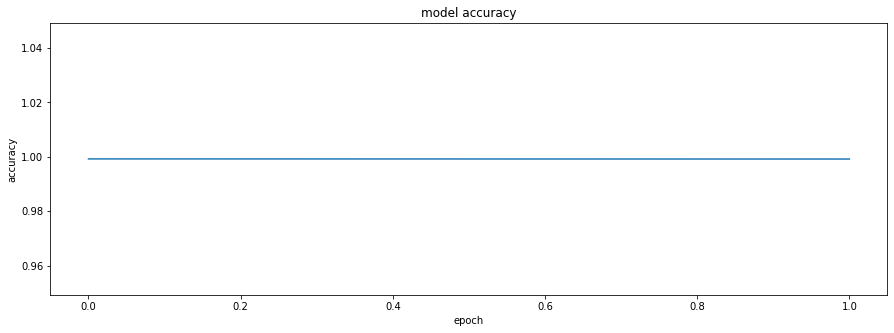

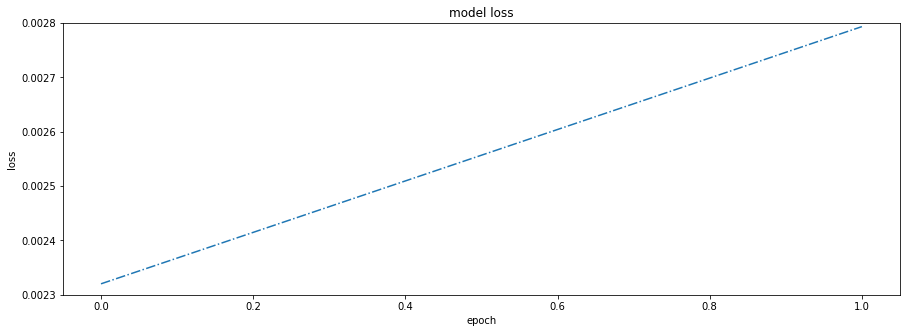

In [65]:
plot_accuracies(history[3],0.995)
plot_losses(history[3], np.array(history[3].history['loss']).min().round(4), np.array(history[3].history['loss']).max().round(4))

In [55]:
np.array(history[3].history['loss']).min()

0.0023202006107912137

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.041674472621872745, 0.9901]


In [0]:
model.save('new1_9925.hdf5')

In [0]:
# from keras.models import load_model
# # Custom model loaded for testing--->This model achieved 99.06% accuracy:
# model2 = load_model('new1.hdf5')

In [0]:
#score2 = model2.evaluate(X_test, Y_test, verbose=1)

In [0]:
#print(score2)

In [0]:
y_pred = model.predict(X_test)

In [32]:
print(y_pred[:9])
print(y_test[:9])

[[1.0691566e-18 3.7902828e-20 1.1002141e-15 9.3281306e-14 2.1983728e-27
  6.9152083e-23 2.3554664e-38 1.0000000e+00 1.7904439e-20 9.2941114e-16]
 [5.0774783e-08 6.3214035e-14 1.0000000e+00 6.9647363e-17 5.0496123e-24
  1.6981392e-23 3.6274840e-16 2.6239478e-22 3.5317616e-19 2.9122907e-21]
 [3.0793708e-11 9.9999976e-01 1.3943275e-08 2.9710991e-11 2.3928513e-08
  7.2557121e-10 2.5075619e-12 2.6822045e-07 1.5698060e-08 1.3735302e-08]
 [1.0000000e+00 3.1962073e-14 2.2225744e-11 1.3760141e-15 6.0033914e-14
  3.0657182e-10 2.7147809e-10 2.3848350e-21 7.6804795e-13 4.0348308e-11]
 [6.1109893e-17 1.7398210e-11 4.0865690e-19 4.9171894e-20 9.9995100e-01
  7.8785140e-18 2.7515493e-18 5.0664446e-15 2.4741014e-14 4.9001123e-05]
 [1.1430699e-13 9.9999607e-01 1.1490851e-10 3.3550536e-12 3.0934673e-09
  1.0408588e-12 8.0175882e-16 3.9367828e-06 1.3852333e-11 6.9331527e-09]
 [2.5218404e-18 3.2207783e-08 3.0246888e-12 1.8350527e-16 9.9997222e-01
  1.0227062e-11 1.3216641e-22 3.2567985e-12 1.1148616e-09 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

type(y_pred[0])

numpy.ndarray

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [35]:
model.layers[0].name

'conv2d_1'

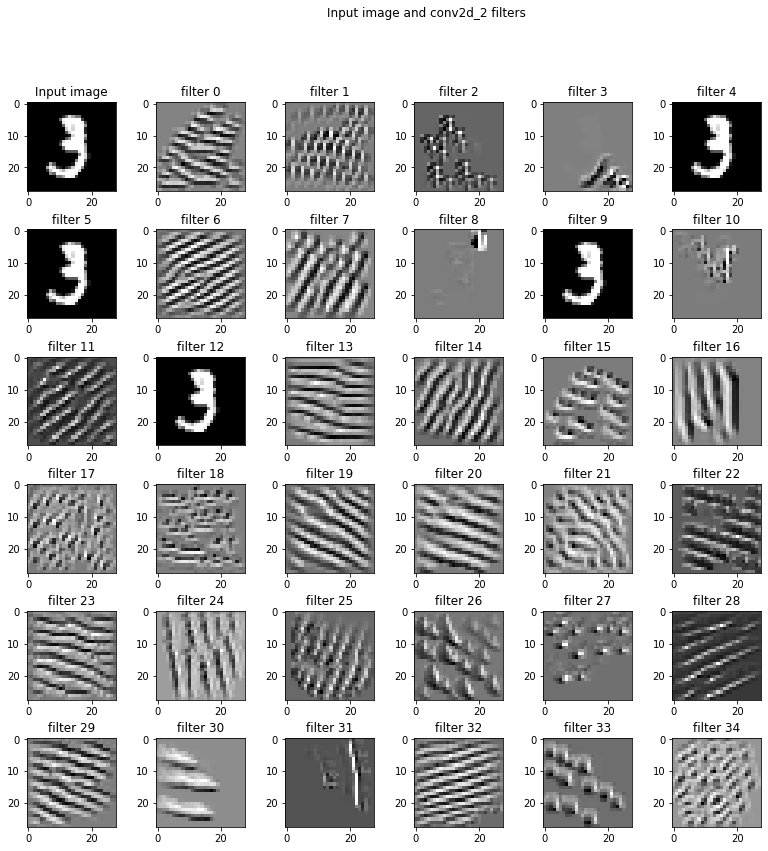

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(img = np.array(X_train[10]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name=model.layers[1].name)

### Below is a test with Kaggle dataset and predictions from https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist/data 

Reached around 99.5% accuracy with my model and using labels + test data set from the above link

In [0]:
# X_train.shape

In [0]:
# new_test = pd.read_csv("/content/test_mnist.csv")

In [0]:
# Y_new_test = pd.read_csv("/content/MNIST-CNN.csv")
# X_new_test = pd.read_csv("/content/test_MNIST.csv")

In [0]:
# X_new_test = X_new_test / 255.0

In [0]:
# Y_new_test.drop(labels = ["ImageId"],axis = 1)

In [0]:
# X_new_test.values[0]

In [0]:
# X_new_test = X_new_test.values.reshape(-1,28,28,1)

In [0]:
# Y_new_test = np_utils.to_categorical(Y_new_test['Label'], 10)


In [0]:
# score2 = model.evaluate(X_new_test, Y_new_test, verbose=0)
# print(score2)

In [0]:
# result = model.predict(X_new_test)

In [0]:
# result = np.argmax(result,axis = 1)

In [0]:
# result = pd.Series(result,name="Label")
# submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
# submission.to_csv("/contentMNIST-CNN_own.csv",index=False)